# Procesamiento Morfológico

In [6]:
from PIL import Image
from PIL import ImageDraw
import numpy as np
from matplotlib import pyplot as plt

## Kernel'sdefinidos en TP5

In [5]:
#IDENTIDAD
kerI3= np.zeros((3,3))
kerI3[1][1]=1
#Plano
ker_plano= np.zeros((3,3))
ker_plano+=1/9
#Bartlett3
Bartlett3= np.array((1,2,1))
kerB3= np.dot(Bartlett3.reshape((3,1)), Bartlett3.reshape((1,3)))/16
#Bartlett5
Bartlett5= np.array((1,2,3,2,1))
kerB5= np.dot(Bartlett5.reshape((5,1)), Bartlett5.reshape((1,5)))/81
#Bartlett7
Bartlett7= np.array((1,2,3,4,3,2,1))
kerB7= np.dot(Bartlett7.reshape((7,1)), Bartlett7.reshape((1,7)))/256
#Gauss5
Gauss5= np.array((1,4,6,4,1))
kerG5= np.dot(Gauss5.reshape((5,1)), Gauss5.reshape((1,5)))/256
#Gauss7
Gauss7= np.array((1,6,15,20,15,6,1))
kerG7= np.dot(Gauss7.reshape((7,1)), Gauss7.reshape((1,7)))/4096
#Laplaceano4V
kerLA4v= np.array(((0,-1,0),(-1,4,-1),(0,-1,0)))
#Laplaceano4V02
kerLA4v02= kerI3+kerLA4v*0.2

#Laplaceano8V
kerLA8v= np.array(((-1,-1,-1),(-1,8,-1),(-1,-1,-1)))
#Sobel
kerSOBe= np.array(((-1,0,1),(-2,0,2),(-1,0,1)))
kerSOBse= np.array(((-2,-1,0),(-1,0,1),(0,1,2)))
kerSOBs= np.rot90(kerSOBe)
kerSOBso= np.rot90(kerSOBse)
kerSOBo= np.rot90(kerSOBs)
kerSOBno= np.rot90(kerSOBso)
kerSOBn= np.rot90(kerSOBo)
kerSOBne= np.rot90(kerSOBno)
#Laplace5x5
kerLA5= np.ones((5,5))*(-1)
kerLA5[2][2]=24
#Laplacev5x5
kerLA5v= np.array(((-1/16,-1/16,-1/16,-1/16,-1/16),(-1/16,1/9,1/9,1/9,-1/16),(-1/16,1/9,1/9,1/9,-1/16),(-1/16,1/9,1/9,1/9,-1/16),(-1/16,-1/16,-1/16,-1/16,-1/16)))
#DiferenciasGaus 5X5
Gaus3= np.array((0,1,2,1,0))
kerG3= np.dot(Gaus3.reshape((5,1)), Gaus3.reshape((1,5)))/16
kerDG5= kerG5-kerG3

## Funciones definidas en TP1

In [3]:
def im_to_YIQ(im):
    im_norm= im/256
    mat_a_YIQ= np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    im_yiq= np.dot(im_norm, mat_a_YIQ.T)
    return im_yiq

def yiq_coef(im, alpha, beta):
    coe= [alpha,beta,beta]
    im_yiq_coef= im*coe
    #Clampeo Y
    im_yiq_coef[:,:,0][im_yiq_coef[:,:,0]>1] = 1
    #Clampeo I
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]>0.5957] = 0.5957
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]<(-0.5957)] = (-0.5957)
    #Clampeo Q
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]>0.5226] = 0.5226
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]<(-0.5226)] =( -0.5226)
    
    return im_yiq_coef

##CORRECCIÓn

def im_to_RGB(im):
    mat_a_RGB= np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    im_RGB= np.dot(im, mat_a_RGB.T)
    im_RGB*= 255
    #Clampeo RGB
    im_RGB[im_RGB>255]= 255
    im_RGB[im_RGB<0]= 0
    
    return im_RGB.astype(np.uint8)
 
def show_two_im(a, b, text):
    im1= Image.fromarray(a)
    im2= Image.fromarray(b)
    plt.subplot(121), plt.imshow(im1)
    plt.title("Original")

    plt.subplot(122), plt.imshow(im2)
    plt.title(text)

## Fuciones definidas en TP5

In [2]:
def conv_ker(im, ker):
    arr= np.asarray(im)
    arr_yiq= im_to_YIQ(arr)
    Y= arr_yiq[:,:,0]

    w= arr_yiq.shape[0]
    h= arr_yiq.shape[1]
    cant= ker.shape[0]
    au= int((cant-1)/2)
    nuevo= np.zeros((w+cant-1,h+cant-1))

    aux= np.zeros((cant,cant))

    for x in range(w):
        for y in range (h):
            nuevo[x+au][y+au]= Y[x][y]

    nuevo_y= np.zeros((w,h))

    for x in range(au,w+au):
        for y in range (au, h+au):
            aux= nuevo[x-au:x+au+1,y-au:y+au+1]
            aux_2= aux*ker
            valor= np.sum(aux_2)
            nuevo_y[x-au][y-au]= valor

    nuevo_y[nuevo_y>1]=1
    nuevo_y[nuevo_y<0]=0
    return nuevo_y

def kerLAamp(fact):
    ker= kerI3+kerLA4v*fact
    return ker

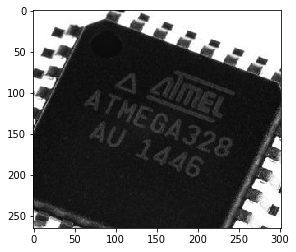

In [40]:
#Imagen Original
im1= Image.open("atmega3.jpg")
ima= np.asarray(im1)
im_yiq= im_to_YIQ(ima)
Y= im_yiq[:,:,0]
plt.imshow(Y, cmap="gray")

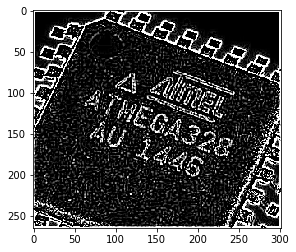

In [41]:
#Filtro Laplaceano
im_fil= conv_ker(im1, kerLA5)
plt.imshow(im_fil, cmap="gray")

## Erosión

In [48]:
#Erosión, mínimo
arr_yiq= im_yiq
w= arr_yiq.shape[0]
h= arr_yiq.shape[1]
#cant= ker.shape[0]
cant=3
au= int((cant-1)/2)
nuevo= np.zeros((w+cant-1,h+cant-1))

aux= np.zeros((cant,cant))

for x in range(w):
    for y in range (h):
        nuevo[x+au][y+au]= Y[x][y]
nuevo_y= np.zeros((w,h))
for x in range(au,w+au):
    for y in range (au, h+au):
        aux= nuevo[x-au:x+au+1,y-au:y+au+1]
        #aux_2= aux*ker
        valor= aux.min()
        nuevo_y[x-au][y-au]= valor
y_ero= nuevo_y
# nuevo_y[nuevo_y>1]=1
# nuevo_y[nuevo_y<0]=0


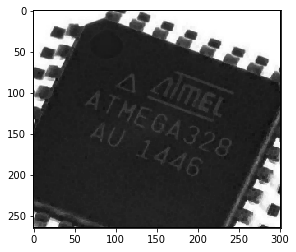

In [49]:
plt.imshow(nuevo_y, cmap="gray")
plt.imsave("out.bmp",nuevo_y, cmap="gray")

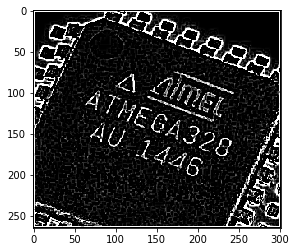

In [44]:
#Filtro Laplaceano
im2= Image.open("out.bmp")
im_fil2= conv_ker(im2, kerLA5)
plt.imshow(im_fil2, cmap="gray")

## Dilatación

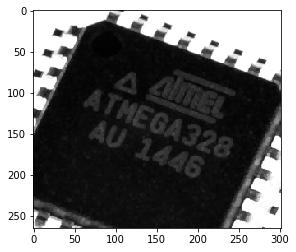

In [45]:
#Dilatación, máximo
arr_yiq= im_yiq
w= arr_yiq.shape[0]
h= arr_yiq.shape[1]
#cant= ker.shape[0]
cant=3
au= int((cant-1)/2)
nuevo= np.zeros((w+cant-1,h+cant-1))

aux= np.zeros((cant,cant))

for x in range(w):
    for y in range (h):
        nuevo[x+au][y+au]= Y[x][y]
nuevo_y= np.zeros((w,h))
for x in range(au,w+au):
    for y in range (au, h+au):
        aux= nuevo[x-au:x+au+1,y-au:y+au+1]
        #aux_2= aux*ker
        valor= aux.max()
        nuevo_y[x-au][y-au]= valor

# nuevo_y[nuevo_y>1]=1
# nuevo_y[nuevo_y<0]=0

plt.imshow(nuevo_y, cmap="gray")
plt.imsave("out.bmp",nuevo_y, cmap="gray")

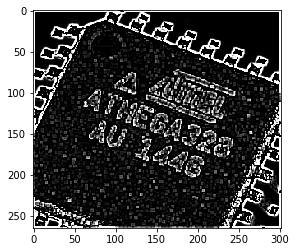

In [46]:
#Filtro Laplaceano
im2= Image.open("out.bmp")
im_fil2= conv_ker(im2, kerLA5)
plt.imshow(im_fil2, cmap="gray")

## Apertura (Erosión y luego dilatación)

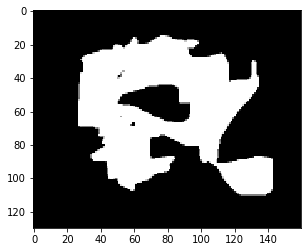

In [92]:
#Imagen Original
im1= Image.open("prueba.png")
ima= np.asarray(im1)
im_yiq= im_to_YIQ(ima)
Y= im_yiq[:,:,0]
plt.imshow(Y, cmap="gray")

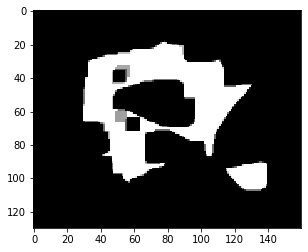

In [100]:
#Erosión, mínimo
arr_yiq= im_yiq
w= arr_yiq.shape[0]
h= arr_yiq.shape[1]
#cant= ker.shape[0]
cant=7
au= int((cant-1)/2)
nuevo= np.zeros((w+cant-1,h+cant-1))

aux= np.zeros((cant,cant))

for x in range(w):
    for y in range (h):
        nuevo[x+au][y+au]= Y[x][y]
nuevo_y= np.zeros((w,h))
for x in range(au,w+au):
    for y in range (au, h+au):
        aux= nuevo[x-au:x+au+1,y-au:y+au+1]
        #aux_2= aux*ker
        valor= aux.min()
        nuevo_y[x-au][y-au]= valor
y_ero= nuevo_y

plt.imshow(y_ero, cmap="gray")
plt.imsave("out.bmp",y_ero, cmap="gray")

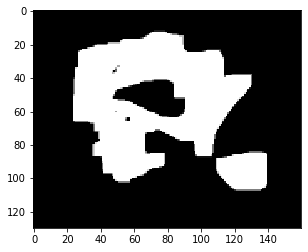

In [101]:
#Dilatación, máximo
arr_yiq= im_yiq
w= arr_yiq.shape[0]
h= arr_yiq.shape[1]
#cant= ker.shape[0]
cant=7
au= int((cant-1)/2)
nuevo= y_ero

nuevo_y= np.zeros((w,h))
for x in range(au,w+au):
    for y in range (au, h+au):
        aux= nuevo[x-au:x+au+1,y-au:y+au+1]
        #aux_2= aux*ker
        valor= aux.max()
        nuevo_y[x-au][y-au]= valor

# nuevo_y[nuevo_y>1]=1
# nuevo_y[nuevo_y<0]=0

plt.imshow(nuevo_y, cmap="gray")
plt.imsave("out.bmp",nuevo_y, cmap="gray")

## Cierre (Dilatación y luego Erosión)

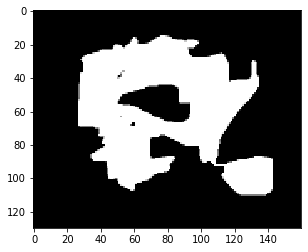

In [7]:
#Imagen Original
im1= Image.open("prueba.png")
ima= np.asarray(im1)
im_yiq= im_to_YIQ(ima)
Y= im_yiq[:,:,0]
plt.imshow(Y, cmap="gray")

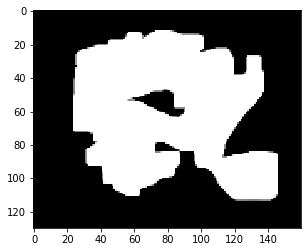

In [104]:
#Dilatación, máximo
arr_yiq= im_yiq
w= arr_yiq.shape[0]
h= arr_yiq.shape[1]
#cant= ker.shape[0]
cant=7
au= int((cant-1)/2)
nuevo= np.zeros((w+cant-1,h+cant-1))

aux= np.zeros((cant,cant))

for x in range(w):
    for y in range (h):
        nuevo[x+au][y+au]= Y[x][y]
nuevo_y= np.zeros((w,h))
for x in range(au,w+au):
    for y in range (au, h+au):
        aux= nuevo[x-au:x+au+1,y-au:y+au+1]
        #aux_2= aux*ker
        valor= aux.max()
        nuevo_y[x-au][y-au]= valor

# nuevo_y[nuevo_y>1]=1
# nuevo_y[nuevo_y<0]=0
y_dil= nuevo_y
plt.imshow(nuevo_y, cmap="gray")
plt.imsave("out.bmp",nuevo_y, cmap="gray")

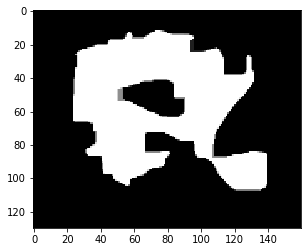

In [106]:
#Erosión, mínimo
arr_yiq= im_yiq
w= arr_yiq.shape[0]
h= arr_yiq.shape[1]
#cant= ker.shape[0]
cant=7
au= int((cant-1)/2)
nuevo= y_dil

nuevo_y= np.zeros((w,h))
for x in range(au,w+au):
    for y in range (au, h+au):
        aux= nuevo[x-au:x+au+1,y-au:y+au+1]
        #aux_2= aux*ker
        valor= aux.min()
        nuevo_y[x-au][y-au]= valor
y_ero= nuevo_y
# nuevo_y[nuevo_y>1]=1
# nuevo_y[nuevo_y<0]=0
plt.imshow(y_ero, cmap="gray")
plt.imsave("out.bmp",y_ero, cmap="gray")

## Mediana

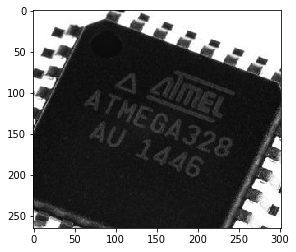

In [108]:
#Imagen Original
im1= Image.open("atmega3.jpg")
ima= np.asarray(im1)
im_yiq= im_to_YIQ(ima)
Y= im_yiq[:,:,0]
plt.imshow(Y, cmap="gray")

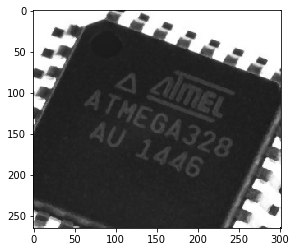

In [110]:
#Mediana
arr_yiq= im_yiq
w= arr_yiq.shape[0]
h= arr_yiq.shape[1]
#cant= ker.shape[0]
cant=3
au= int((cant-1)/2)
nuevo= np.zeros((w+cant-1,h+cant-1))

aux= np.zeros((cant,cant))

for x in range(w):
    for y in range (h):
        nuevo[x+au][y+au]= Y[x][y]
nuevo_y= np.zeros((w,h))
for x in range(au,w+au):
    for y in range (au, h+au):
        aux= nuevo[x-au:x+au+1,y-au:y+au+1]
        #aux_2= aux*ker
        valor= np.median(aux)
        nuevo_y[x-au][y-au]= valor

# nuevo_y[nuevo_y>1]=1
# nuevo_y[nuevo_y<0]=0b

plt.imshow(nuevo_y, cmap="gray")
plt.imsave("out.bmp",nuevo_y, cmap="gray")

## Definición de funciones para aplicativo

In [197]:
def erosion(im, tam):
    ima= np.asarray(im)
    arr_yiq= im_to_YIQ(ima)
    w= arr_yiq.shape[0]
    h= arr_yiq.shape[1]
    Y=arr_yiq[:,:,0]
    cant=tam
    au= int((cant-1)/2)
    nuevo= np.zeros((w+cant-1,h+cant-1))
    aux= np.zeros((cant,cant))
    for x in range(w):
        for y in range (h):
            nuevo[x+au][y+au]= Y[x][y]
    nuevo_y= np.zeros((w,h))

    for x in range(au,w+au):
        for y in range (au, h+au):
            aux= nuevo[x-au:x+au+1,y-au:y+au+1]
            valor= aux.min()
            nuevo_y[x-au][y-au]= valor
    return nuevo_y

def dilatacion(im, tam):
    ima= np.asarray(im)
    arr_yiq= im_to_YIQ(ima)
    w= arr_yiq.shape[0]
    h= arr_yiq.shape[1]
    Y=arr_yiq[:,:,0]
    cant=tam
    au= int((cant-1)/2)
    nuevo= np.zeros((w+cant-1,h+cant-1))
    aux= np.zeros((cant,cant))
    for x in range(w):
        for y in range (h):
            nuevo[x+au][y+au]= Y[x][y]
    nuevo_y= np.zeros((w,h))

    for x in range(au,w+au):
        for y in range (au, h+au):
            aux= nuevo[x-au:x+au+1,y-au:y+au+1]
            valor= aux.max()
            nuevo_y[x-au][y-au]= valor
    return nuevo_y

def apertura(im, tam):
    #Erosión
    ima= np.asarray(im)
    arr_yiq= im_to_YIQ(ima)
    w= arr_yiq.shape[0]
    h= arr_yiq.shape[1]
    Y=arr_yiq[:,:,0]
    cant=tam
    au= int((cant-1)/2)
    nuevo= np.zeros((w+cant-1,h+cant-1))
    aux= np.zeros((cant,cant))
    
    for x in range(w):
        for y in range (h):
            nuevo[x+au][y+au]= Y[x][y]
    
    y_ero= np.zeros((w+cant-1,h+cant-1))

    for x in range(au,w+au):
        for y in range (au, h+au):
            aux= nuevo[x-au:x+au+1,y-au:y+au+1]
            valor= aux.min()
            y_ero[x][y]= valor
    #Dilatación
    y_dil= np.zeros((w,h))
    for x in range(au,w+au):
        for y in range (au, h+au):
            aux= y_ero[x-au:x+au+1,y-au:y+au+1]
            valor= aux.max()
            y_dil[x-au][y-au]= valor
    return y_dil

def cierre(im, tam):
    #Dilatación
    ima= np.asarray(im)
    arr_yiq= im_to_YIQ(ima)
    w= arr_yiq.shape[0]
    h= arr_yiq.shape[1]
    Y=arr_yiq[:,:,0]
    cant=tam
    au= int((cant-1)/2)
    nuevo= np.zeros((w+cant-1,h+cant-1))
    aux= np.zeros((cant,cant))
    for x in range(w):
        for y in range (h):
            nuevo[x+au][y+au]= Y[x][y]
    y_dil= np.zeros((w+cant-1,h+cant-1))

    for x in range(au,w+au):
        for y in range (au, h+au):
            aux= nuevo[x-au:x+au+1,y-au:y+au+1]
            valor= aux.max()
            y_dil[x][y]= valor
    #Erosión
    y_ero= np.zeros((w,h))
    for x in range(au,w+au):
        for y in range (au, h+au):
            aux= y_dil[x-au:x+au+1,y-au:y+au+1]
            valor= aux.max()
            y_ero[x-au][y-au]= valor
    return y_ero

def borde_ext(im, cant):
    y_ori=im_to_YIQ(np.asarray(im))[:,:,0]
    y_dil= dilatacion(im,cant)
    y_borde_ext= y_dil- y_ori
    #Clampeo
    y_borde_ext[y_borde_ext>1]=1
    y_borde_ext[y_borde_ext<0]=0
    return y_borde_ext

def borde_int(im, cant):
    y_ori=im_to_YIQ(np.asarray(im))[:,:,0]
    y_ero= erosion(im,cant)
    y_borde_int= y_ori-y_ero
    #Clampeo
    y_borde_int[y_borde_int>1]=1
    y_borde_int[y_borde_int<0]=0
    return y_borde_int

def mediana(im, tam):
    ima= np.asarray(im)
    arr_yiq= im_to_YIQ(ima)
    w= arr_yiq.shape[0]
    h= arr_yiq.shape[1]
    Y=arr_yiq[:,:,0]
    cant=tam
    au= int((cant-1)/2)
    nuevo= np.zeros((w+cant-1,h+cant-1))
    aux= np.zeros((cant,cant))
    for x in range(w):
        for y in range (h):
            nuevo[x+au][y+au]= Y[x][y]
    nuevo_y= np.zeros((w,h))

    for x in range(au,w+au):
        for y in range (au, h+au):
            aux= nuevo[x-au:x+au+1,y-au:y+au+1]
            valor= np.median(aux)
            nuevo_y[x-au][y-au]= valor
    return nuevo_y

def gradiente(im, cant):
    y_dil= dilatacion(im,cant)
    y_ero= erosion(im,cant)
    y_gradiente= y_dil-y_ero
    #Clampeo
    y_gradiente[y_gradiente>1]=1
    y_gradiente[y_gradiente<0]=0
    return y_gradiente

def tophat(im, cant):
    y_ori=im_to_YIQ(np.asarray(im))[:,:,0]
    y_ap= apertura(im,cant)
    y_tophat= y_ori-y_ap
    #Clampeo
    y_tophat[y_tophat>1]=1
    y_tophat[y_tophat<0]=0
    return y_tophat

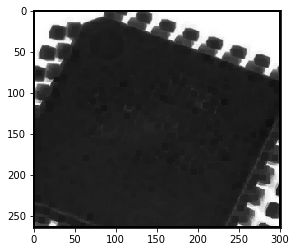

In [182]:
im1= Image.open("atmega3.jpg")
y_pro= erosion(im1,7)

plt.imshow(y_pro, cmap="gray")
plt.imsave("out.bmp",nuevo_y, cmap="gray")

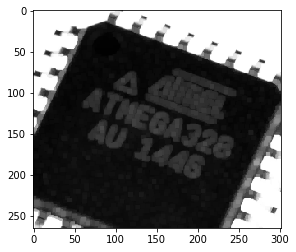

In [180]:
im1= Image.open("atmega3.jpg")
y_pro= dilatacion(im1,5)

plt.imshow(y_pro, cmap="gray")
plt.imsave("out.bmp",nuevo_y, cmap="gray")

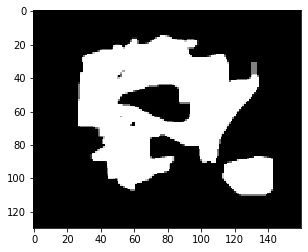

In [195]:
im1= Image.open("prueba.png")
y_pro= apertura(im1,3)

plt.imshow(y_pro, cmap="gray")

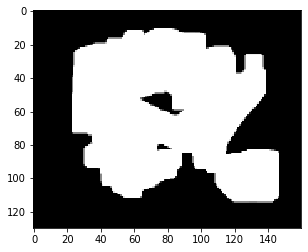

In [196]:
im1= Image.open("prueba.png")
y_pro= cierre(im1,5)

plt.imshow(y_pro, cmap="gray")

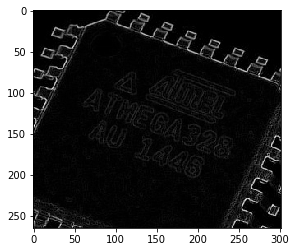

In [162]:
im1= Image.open("atmega3.jpg")
y_pro= borde_ext(im1,3)

plt.imshow(y_pro, cmap="gray")

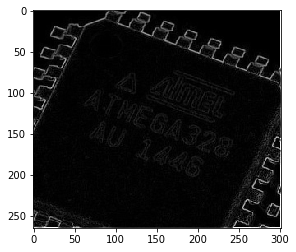

In [164]:
im1= Image.open("atmega3.jpg")
y_pro= borde_int(im1,3)

plt.imshow(y_pro, cmap="gray")

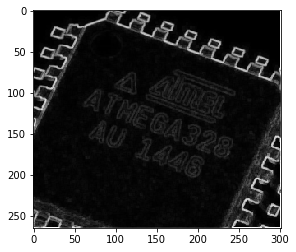

In [166]:
im1= Image.open("atmega3.jpg")
y_pro= gradiente(im1,3)

plt.imshow(y_pro, cmap="gray")

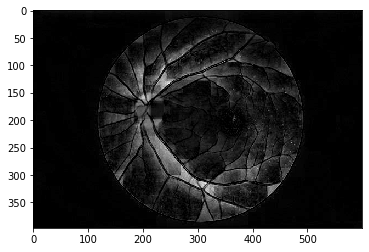

In [179]:
im1= Image.open("retina.jpg")

y_pro= tophat(im1,21)
plt.imshow(y_pro, cmap="gray")